# A Python Quick Start Tutorial
# Lesson \#2 : More on Data Types & Loops
## by Peter Mackenzie-Helnwein
University of Washington, Seattle, WA

pmackenz@uw.edu          
https://www.ce.washington.edu/facultyfinder/peter-mackenzie-helnwein

## Resources (reminder)

   1. Python Docs: https://docs.python.org/3/
   
   1. Python Tutorial (comprehensive): https://docs.python.org/3/tutorial/index.html
   
   1. Python Library Reference (the nitty-gritty details): https://docs.python.org/3/library/index.html
   
   1. Everything else: http://google.com
   

## Discussing questions from the self-study assignment

This section is to discuss your questions


### Summary of our previous session

This is the short version of all we achieved working together during our previous session.  We will be using this for further examples.

**Theory**:
Stress transformation

$$
\begin{aligned}
\sigma_{x}' &= \sigma_{x} \cos^2\theta + \sigma_{y} \sin^2\theta + 2\tau_{xy} \sin\theta \cos\theta \\
\sigma_{y}' &= \sigma_{x} \sin^2\theta + \sigma_{y} \cos^2\theta - 2\tau_{xy} \sin\theta \cos\theta \\
\tau_{xy}'  &= (\sigma_{y} - \sigma_{x}) \sin\theta \cos\theta + \tau_{xy} (\cos^2\theta - \sin^2\theta) \\
\end{aligned}
$$

**Given**:
Stress state:

$$
\sigma_{x} = 12~ksi~,
~~~
\sigma_{y} = -5.5~ksi~,
~~~
\tau_{xy} = 3.5~ksi 
$$

**Find**:
Components of stress in a rotated coordinate system for $\theta=25^\circ$.

In [1]:
# load needed functions from library module math
from math import sin,cos,radians

# define function(s)
def stressTransform(sigx, sigy, tauxy, theta):

    th = radians(theta)

    sx  = sigx * cos(th)**2 + sigy * sin(th)**2 + 2*tauxy * sin(th) * cos(th)
    sy  = sigx * sin(th)**2 + sigy * cos(th)**2 - 2*tauxy * sin(th) * cos(th)
    txy = (sigy - sigx) * sin(th) * cos(th) + tauxy * (cos(th)**2 - sin(th)**2) 
    
    return (sx,sy,txy)

# define some input parameters
sigma_x = 12.
sigma_y = -5.5
tau_xy  =  3.5

# use that function
template = "sigma_x={:12.6f} ksi\nsigma_y={:12.6f} ksi\ntau_xy ={:12.6f} ksi\n"
print(template.format(*stressTransform(sigma_x, sigma_y, tau_xy, 0)))
print(template.format(*stressTransform(sigma_x, sigma_y, tau_xy, 25)))
print(template.format(*stressTransform(sigma_x, sigma_y, tau_xy, 180)))

sigma_x=   12.000000 ksi
sigma_y=   -5.500000 ksi
tau_xy =    3.500000 ksi

sigma_x=   11.555547 ksi
sigma_y=   -5.055547 ksi
tau_xy =   -4.453132 ksi

sigma_x=   12.000000 ksi
sigma_y=   -5.500000 ksi
tau_xy =    3.500000 ksi



## Exercise 1: List versus dictionary

You could express the stress state as

1. three independent variables - the way we did it thus far

2. a list of three values: `stress = `$[\sigma_x, \sigma_y, \tau_{xy}]$ and replace

        sigma_x --> stress[0]
        sigma_y --> stress[1]
        tau_xy  --> stress[2]
        
3. a dictionary 

        stress = {'sigx': 12.0, 'sigy': -5.5, 'tau':3.50}
        
   and replace

        sigma_x --> stress['sigx']
        sigma_y --> stress['sigy']
        tau_xy  --> stress['tau']

**Discuss**:

1. Pros and cons for coding the equations
2. Pros and cons for coding the function(s)
3. How woud code and function change when switching from 2D to 3D (6 components instead of 3 components)

**Implement**:
An alternative version of the `stressTransform(...)` function using a dictionary as defined under item 3. above.

In [16]:
# load needed functions from library module math
from math import sin,cos,radians

def stressTransform2(stress, theta): #stress is a dictionary
    # YOUR CODE HERE ...
    th = radians(theta)

    #call through keywords, and this essentially gives us a lot of defaults to use
    if 'sigx' in stress:
        sigx = stress['sigx']
    else:
        sigx = 0.0

    if 'sigy' in stress:
        sigy = stress['sigy']
    else:
        sigy = 0.0

    if 'tau' in stress:
        tauxy = stress['tau']
    else:
        tauxy = 0.0
    

    sx  = sigx * cos(th)**2 + sigy * sin(th)**2 + 2*tauxy * sin(th) * cos(th)
    sy  = sigx * sin(th)**2 + sigy * cos(th)**2 - 2*tauxy * sin(th) * cos(th)
    txy = (sigy - sigx) * sin(th) * cos(th) + tauxy * (cos(th)**2 - sin(th)**2) 
    
    # stress_out is another dictionary containing the transformed stress
    if 'sigz' in stress: #3d, planar transformation
        ans = {'sigx': sx, 'sigy': sy, 'tau':txy, 'sigz':stress['sigz']}
    else: #2d transfroramation
        ans = {'sigx': sx, 'sigy': sy, 'tau':txy}
   
    return ans

Initialize given stress

In [17]:
given_stress1 = {'sigx': 12.0, 'sigy': -5.5, 'tau':3.50}

In [18]:
given_stress2 = {'sigx': 12.0, 'sigy': -5.5, 'tau':3.50, 'sigz':99}

In [19]:
stressTransform2(given_stress1, 25.0)

{'sigx': 11.555547135673642,
 'sigy': -5.055547135673642,
 'tau': -4.453132243388171}

In [20]:
stressTransform2(given_stress2, 25.0)

{'sigx': 11.555547135673642,
 'sigy': -5.055547135673642,
 'tau': -4.453132243388171,
 'sigz': 99}

other ways to write dictionaries

In [21]:
stress4 = dict(
    sigx = 12.0, #stress in x-direction
    sigy = -5.5, #stress in y-direction
    tau = 3.5 #shear stress
)
stress4

{'sigx': 12.0, 'sigy': -5.5, 'tau': 3.5}

Add some nice print out for all transformation angles in the $\theta$-list 

Adding the ** allows us to read into the dict

In [22]:
theta_list = [0., 25., 45., 75., 90., 180.]

template = "{th:8.2f},{sigx:12.6f},{sigy:12.6f},{tau:12.6f}"

for theta in theta_list:
    print(template.format(th=theta, **stressTransform2(given_stress, theta)))

    0.00,   12.000000,   -5.500000,    3.500000
   25.00,   11.555547,   -5.055547,   -4.453132
   45.00,    6.750000,   -0.250000,   -8.750000
   75.00,   -2.577722,    9.077722,   -7.406089
   90.00,   -5.500000,   12.000000,   -3.500000
  180.00,   12.000000,   -5.500000,    3.500000


jupyter notebook # Windows PowerShell

jupyter-notebook # Mac, Ubuntu, Linux

### Exercise 2 : Boolean variables

Badly formulated boolean expressions are a common source for faulty code.  This exercise shall emphasize how easy it is to misinterpret conditions.  Moreover, we will explore ways to test and improve our conditions.

**Your Task**:
predict the data type and value of the following boolean expressions.  Is this `True` or `False`?
Anything not 0 is 1 for floats

    17 <= 365/21  and  'Monday' < 'Friday'

    'Monday'  < 'Friday'  or  cos( 3.1427 )
    0 or ~-1(so 1)
    
    (100 - 99) and sin( 3.14127/3 )  or  'Friday' > 'Monday'
    1 and 1 or
    
    (100 - 99) and sin( 3.14127/3 )  and 'Friday' > 'Monday'
    
    (100 - 99) or sin( 3.14127/3 )  and 'Friday' > 'Monday'
    
    ( (100 - 99) or sin( 3.14127/3 ) )  and 'Friday' > 'Monday'
    
    ( (100 - 99) and sin( 3.14127/3 ) ) or 'Friday' > 'Monday'
    (1 and 1) or (0)
    
Write a simple test function that tells you how the computer interprets the result:


In [26]:
## YOUR CODE HERE
17 <= 365/21  and  'Monday' < 'Friday'

False

In [27]:
365/21

17.38095238095238

In [28]:
17 <= 365/21

True

In [34]:
'Monday' < 'Friday' #friday is before monday because alphabetically F is earlier

False

In [35]:
cd = (100-99) and sin(3.14127/3) or 'Friday' > 'Monday'

In [46]:
def test(cond): #we can also use this to see if variable are empty
    if cond: #condition has a value itself of 0 or 1
        print('True')
    else:
        print('False')  

In [43]:
test(cd) #We can then combine our variables into any combination to test

True


In [47]:
#make lists
a = [1,2,3]
print(a)

#make tuple
b = (1,2,3)
print(b)
b2 = tuple(a)
print(b2)

#make dictionaries
c = {'a':1, 'b':'Peter'}
print(c)
c2 = dict(a=1, b='Peter')
print(c2)

[1, 2, 3]
(1, 2, 3)
(1, 2, 3)
{'a': 1, 'b': 'Peter'}
{'a': 1, 'b': 'Peter'}


### Exercise 3 : Writing efficient loops in python

**Given**:
Three lists containing $\theta$, $y_1=\sin\theta$, and $y_2=\cos\theta$.


In [48]:
for i in range(10): #indexing in python starts at 0 with 10 values
    print(i)

0
1
2
3
4
5
6
7
8
9


In [49]:
from math import pi, sin, cos

# set a parameter: N is an integer >= 1
N = 10

# initialize the lists
theta = []
y1 = []
y2 = []

# run this to populate the lists
th = 0.0

for i in range(N+1):
    theta.append(th)
    y1.append(sin(th))
    y2.append(cos(th))
    th += pi/N

In [50]:
theta

[0.0,
 0.3141592653589793,
 0.6283185307179586,
 0.9424777960769379,
 1.2566370614359172,
 1.5707963267948966,
 1.8849555921538759,
 2.199114857512855,
 2.5132741228718345,
 2.827433388230814,
 3.141592653589793]

**Your Task**:
Write a loop that prints a table

~~~
theta   sin(theta)    cos(theta)
...
~~~

1. Assume you do not know how many elements are in those lists => you'll have to figure it out
2. use as few variables as possible
3. The shortest working solution requires only two lines of code (more are OK, of course).

**Hint**: 
If you got time left, check out the `zip` command.

In [54]:
## YOUR CODE HERE
template = "{:12.6f} | {:12.6f} | {:12.6f}"

for i in range(N+1):
    print(template.format(theta[i],y1[i],y2[i]))


    0.000000 |     0.000000 |     1.000000
    0.314159 |     0.309017 |     0.951057
    0.628319 |     0.587785 |     0.809017
    0.942478 |     0.809017 |     0.587785
    1.256637 |     0.951057 |     0.309017
    1.570796 |     1.000000 |     0.000000
    1.884956 |     0.951057 |    -0.309017
    2.199115 |     0.809017 |    -0.587785
    2.513274 |     0.587785 |    -0.809017
    2.827433 |     0.309017 |    -0.951057
    3.141593 |     0.000000 |    -1.000000


In [58]:
## YOUR BETTER CODE HERE
template = "{:12.6f} | {:12.6f} | {:12.6f}"

for i in zip(theta,y1,y2):
    #print(template.format(i[0],i[1],i[2]))
    print(template.format(*i)) #we know there are 3 values and this accesses zipped tuple


    0.000000 |     0.000000 |     1.000000
    0.314159 |     0.309017 |     0.951057
    0.628319 |     0.587785 |     0.809017
    0.942478 |     0.809017 |     0.587785
    1.256637 |     0.951057 |     0.309017
    1.570796 |     1.000000 |     0.000000
    1.884956 |     0.951057 |    -0.309017
    2.199115 |     0.809017 |    -0.587785
    2.513274 |     0.587785 |    -0.809017
    2.827433 |     0.309017 |    -0.951057
    3.141593 |     0.000000 |    -1.000000


In [56]:
from numpy import array
N = array([ len(theta), len(y1), len(y2) ]).min()

for i in range(N):
    print("{:12.6f}  {:12.6f}  {:12.6f}".format(theta[i],y1[i],y2[i]))

    0.000000      0.000000      1.000000
    0.314159      0.309017      0.951057
    0.628319      0.587785      0.809017
    0.942478      0.809017      0.587785
    1.256637      0.951057      0.309017
    1.570796      1.000000      0.000000
    1.884956      0.951057     -0.309017
    2.199115      0.809017     -0.587785
    2.513274      0.587785     -0.809017
    2.827433      0.309017     -0.951057
    3.141593      0.000000     -1.000000


Note the important trick:

Loop over **items** in a list, NOT by index!  This makes code more compact and much better readable.

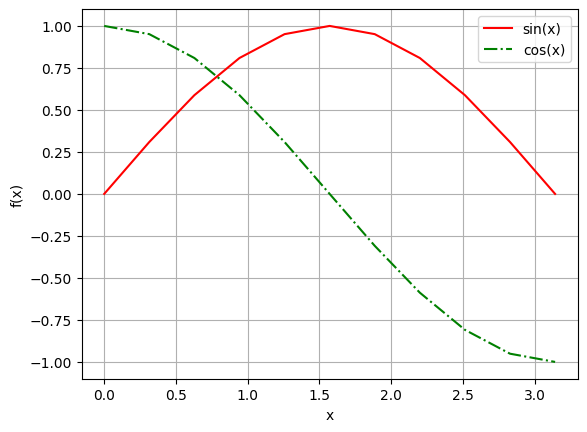

In [59]:
import matplotlib.pyplot as plt

#plot very similarly to matlab
plt.plot(theta, y1,'-r',label='sin(x)')
plt.plot(theta, y2,'-.g',label='cos(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()

#With this you can use the dpi format to increase the resolution at which you save the figures
#plt.savefig("myfigure050.png",dpi=50)
#plt.savefig("myfigure100.png",dpi=100)
#plt.savefig("myfigure300.png",dpi=300)
#plt.savefig("myfigure300.pdf")
plt.show()

### Exercise 4: Looping over dictionaries

**Given**:
A dictionary `your_course` is given as follows (please do a `shift-enter` to initialize it)

In [2]:
your_course = {
               'department':'CEE',
               'group':'CESG',
               'number':'505 A&B',
               'complexity':10,
               'workload':0,
               'credits':3,
               'instructor':'Dr Peter'
              }

**Your tasks**:
1. Write a loop to print all keys, one per line

In [3]:
template = "{:}"
keys = list(your_course.keys())

for i in range(len(keys)):
    print(template.format(keys[i]))



department
group
number
complexity
workload
credits
instructor


In [4]:
for key in your_course:
    print(key)

department
group
number
complexity
workload
credits
instructor


In [5]:
for val in your_course.values():
    print(val)

CEE
CESG
505 A&B
10
0
3
Dr Peter


2. Change complexity to 6 and workload to 8

In [6]:
your_course['complexity'] = 6
your_course ['workload'] = 8


In [7]:
template = "{:}:{:}"
keys = your_course.keys()
vals = your_course.values()

for i in zip(keys,vals):
    print(template.format(*i))


department:CEE
group:CESG
number:505 A&B
complexity:6
workload:8
credits:3
instructor:Dr Peter


3. copy and modify the loop from 1. to print "key: value", one per line

In [8]:
template = "{:}:{:}"
keys = your_course.keys()
vals = your_course.values()

for i in zip(keys,vals):
    print(template.format(*i))

department:CEE
group:CESG
number:505 A&B
complexity:6
workload:8
credits:3
instructor:Dr Peter


In [9]:
for key in your_course:
    print("{:15s} --> {}".format(key,your_course[key]))



department      --> CEE
group           --> CESG
number          --> 505 A&B
complexity      --> 6
workload        --> 8
credits         --> 3
instructor      --> Dr Peter


4. Write a condition that checks if `your_course` has a field named `'expected_grade'`.
    - If the field DOES exist, print **"Field exists with value of {:3.1f}".format(_the value associated with that key_)"**
    - If the field DOES NOT exist, create it and assign a sensible value, the print **"Field created with value of {:3.1f}".format(_the value associated with that key_)"**

In [10]:
your_course = {
               'department':'CEE',
               'group':'CESG',
               'number':'505 A&B',
               'complexity':6,
               'workload':8,
               'credits':3,
               'instructor':'Dr Peter'
              }

In [11]:
cond = 'expected_grade' in your_course

if cond:
    print("Field exists with value of {:3.1f}".format(your_course['expected_grade']))
else:
    your_course['expected_grade'] = 90.
    print("Field created with value of {:3.1f}".format(your_course['expected_grade']))

Field created with value of 90.0


Execute the above code again to verify that the new key/value pair was added

In [12]:
# repeat the code that prints key/value pairs
template = "{:}:{:}"
keys = your_course.keys()
vals = your_course.values()

for i in zip(keys,vals):
    print(template.format(*i))

department:CEE
group:CESG
number:505 A&B
complexity:6
workload:8
credits:3
instructor:Dr Peter
expected_grade:90.0


In [13]:
# just copy the code from two cells above
cond = 'expected_grade' in your_course

if cond:
    print("Field exists with value of {:3.1f}".format(your_course['expected_grade']))
else:
    your_course['expected_grade'] = 90.
    print("Field created with value of {:3.1f}".format(your_course['expected_grade']))

Field exists with value of 90.0


In [14]:
# repeat the code that prints key/value pairs
template = "{:}:{:}"
keys = your_course.keys()
vals = your_course.values()

for i in zip(keys,vals):
    print(template.format(*i))

department:CEE
group:CESG
number:505 A&B
complexity:6
workload:8
credits:3
instructor:Dr Peter
expected_grade:90.0


## 

## Homework questions

We can all learn from your questions!